## Welcome to my Regression Analysis!

#### Loading in the data

In [74]:
import os
import kaggle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit, GridSearchCV
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasRegressor

In [5]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
os.listdir()

['.ipynb_checkpoints',
 'house-prices-advanced-regression-techniques',
 'house-prices-advanced-regression-techniques.zip',
 'Housing_Price_Regression.ipynb',
 'Housing_Price_Regression_Modeling.ipynb',
 'testing_file.py',
 'Untitled.ipynb']

In [7]:
base = os.getcwd()
path = os.path.join(base, 'house-prices-advanced-regression-techniques')
os.listdir(path)

['data_description.txt', 'sample_submission.csv', 'test.csv', 'train.csv']

In [8]:
filepaths = []
for file in os.listdir(path):
    filepath = os.path.join(path, file)
    filepaths.append(filepath)
    
# saving filepaths as variables
description, sample_submission, test, train = filepaths

In [9]:
with open(description) as f: 
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [10]:
pd.read_csv(sample_submission)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [11]:
train = pd.read_csv(train)
test = pd.read_csv(test)

### EDA

In [12]:
#featuring engineering filling 
train[['Alley','MiscFeature']] = train[['Alley','MiscFeature']].fillna('NA')
train[['FireplaceQu','PoolQC','Fence']] = train[['FireplaceQu','PoolQC','Fence']].fillna('Unknown')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [13]:
print(train.shape) 
print(train.head(5))

(1460, 81)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave    NA      Reg   
1   2          20       RL         80.0     9600   Pave    NA      Reg   
2   3          60       RL         68.0    11250   Pave    NA      IR1   
3   4          70       RL         60.0     9550   Pave    NA      IR1   
4   5          60       RL         84.0    14260   Pave    NA      IR1   

  LandContour Utilities  ... PoolArea   PoolQC    Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0  Unknown  Unknown          NA       0   
1         Lvl    AllPub  ...        0  Unknown  Unknown          NA       0   
2         Lvl    AllPub  ...        0  Unknown  Unknown          NA       0   
3         Lvl    AllPub  ...        0  Unknown  Unknown          NA       0   
4         Lvl    AllPub  ...        0  Unknown  Unknown          NA       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008

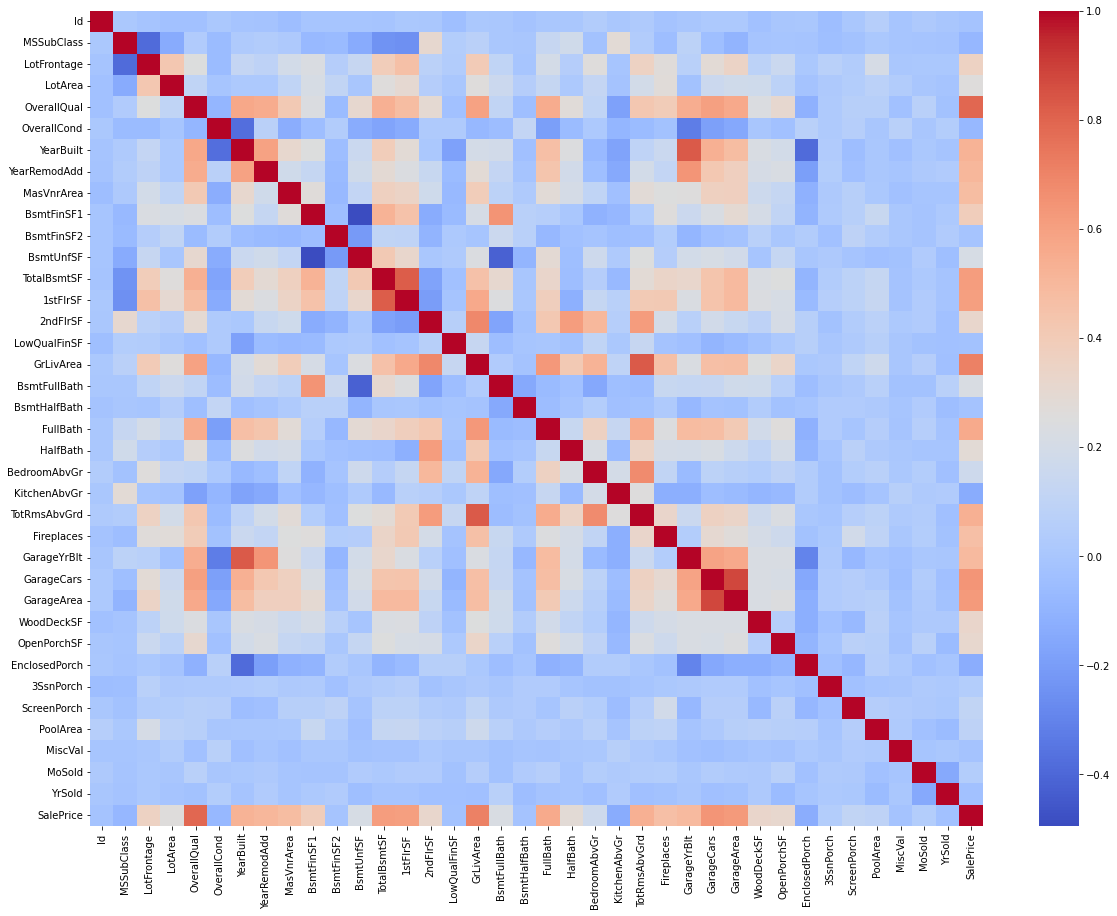

In [14]:
corr_matrix = train.corr()

plt.subplots(figsize=(20, 15))
sns.heatmap(corr_matrix, cmap="coolwarm", annot = False)
plt.show()

In [15]:
corr_matrix['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

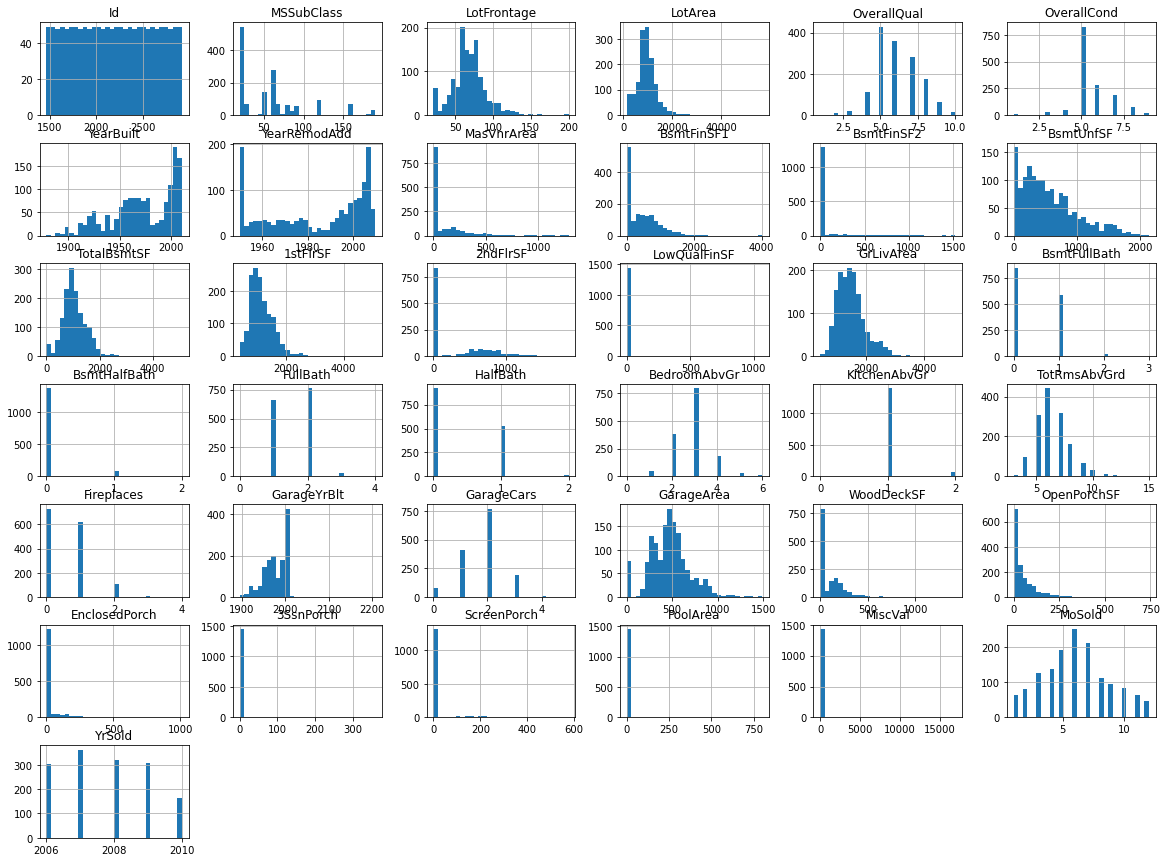

In [16]:
test.hist(bins = 30, figsize =(20,15))
plt.show()

In [17]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,Unknown,Unknown,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,Unknown,Unknown,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,Unknown,Unknown,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,Unknown,Unknown,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,Unknown,Unknown,NA,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NA,IR1,Lvl,AllPub,...,0,Unknown,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NA,Reg,Lvl,AllPub,...,0,Unknown,Unknown,NA,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NA,IR1,Lvl,AllPub,...,0,Unknown,Unknown,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NA,Reg,Lvl,AllPub,...,0,Unknown,Unknown,NA,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NA,Reg,Lvl,AllPub,...,0,Unknown,Unknown,NA,0,1,2008,WD,Normal,118000


In [18]:
#defining target
train_target = train['SalePrice']
train_data = train.drop(columns = 'SalePrice')

In [83]:
temp = train_data[:5]

In [111]:
temp_trans = preprocessor.fit_transform(temp)
temp_trans

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 1.        , 1.        , 0.        ,
        1.        , 1.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 1.        , 1.        , 1.        ,
        1.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 1.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 1.        , 1.  

### Cleaning the data 
#### Note to reader in this notebook i wanted to experiment with pipelines as a way of making code more readible. I thought this was great! This is also my first time using the keras wrapper to implement a DNN. With grid search we can get a more simple model to have similar results

In [221]:
scaler = MinMaxScaler()
one_hot_encoder = OneHotEncoder(handle_unknown ='ignore')
mean_imputer = SimpleImputer(strategy = 'mean')
mode_imputer = SimpleImputer(strategy ='most_frequent')


numerical = ['LotFrontage', 'LotArea', 'MiscVal']
categorical = ['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'Fireplaces', 'Foundation', 'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MoSold', 'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive', 'PoolArea', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'ScreenPorch', 'Street', 'TotRmsAbvGrd', 'TotalBsmtSF', 'Utilities', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold']
drop_columns = ['Alley', 'FireplaceQu']

def create_model():
    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
    ]) 

    model.compile(loss='huber',optimizer='adam', metrics=['mse'])

    return model

DNN = KerasRegressor(build_fn=create_model,epochs=100, batch_size=200, verbose=2)

X_train, X_test, y_train, y_test = train_test_split(train_data, train_target)

num_pipe = Pipeline([
    ('imputer', mean_imputer),
    ('scaler', scaler)
])

cat_pipe = Pipeline([
    ('imputer', mode_imputer),
    ('encoder', one_hot_encoder)
])

preprocessor = ColumnTransformer([
    ('cat', cat_pipe, categorical),
    ('num', num_pipe, numerical)
])

models = DNN

pipe = Pipeline([
            ("preprocessing", preprocessor),
            ("model", TransformedTargetRegressor(regressor = models,transformer=MinMaxScaler()))
       ])
#pipe = TransformedTargetRegressor(regressor=preprocessing_model_pipe, transformer=MinMaxScaler())

In [139]:
fitted_X_train = preprocessor.fit_transform(X_train)
y_train_reshaped = y_train.array.reshape(-1, 1)
scaled_y_train= scaler.fit_transform(y_train_reshaped)
#scaled_y_train= scaler.transform(y_train)
DNN.fit(fitted_X_train,scaled_y_train)

Epoch 1/100
6/6 - 0s - loss: 0.0239 - mse: 0.0478
Epoch 2/100
6/6 - 0s - loss: 0.0043 - mse: 0.0086
Epoch 3/100
6/6 - 0s - loss: 0.0024 - mse: 0.0047
Epoch 4/100
6/6 - 0s - loss: 0.0013 - mse: 0.0026
Epoch 5/100
6/6 - 0s - loss: 6.6319e-04 - mse: 0.0013
Epoch 6/100
6/6 - 0s - loss: 3.4526e-04 - mse: 6.9053e-04
Epoch 7/100
6/6 - 0s - loss: 2.0627e-04 - mse: 4.1253e-04
Epoch 8/100
6/6 - 0s - loss: 1.1950e-04 - mse: 2.3900e-04
Epoch 9/100
6/6 - 0s - loss: 7.3098e-05 - mse: 1.4620e-04
Epoch 10/100
6/6 - 0s - loss: 4.7247e-05 - mse: 9.4493e-05
Epoch 11/100
6/6 - 0s - loss: 3.4327e-05 - mse: 6.8654e-05
Epoch 12/100
6/6 - 0s - loss: 2.0288e-05 - mse: 4.0577e-05
Epoch 13/100
6/6 - 0s - loss: 1.1326e-05 - mse: 2.2652e-05
Epoch 14/100
6/6 - 0s - loss: 7.0429e-06 - mse: 1.4086e-05
Epoch 15/100
6/6 - 0s - loss: 5.0402e-06 - mse: 1.0080e-05
Epoch 16/100
6/6 - 0s - loss: 3.7916e-06 - mse: 7.5832e-06
Epoch 17/100
6/6 - 0s - loss: 3.1302e-06 - mse: 6.2604e-06
Epoch 18/100
6/6 - 0s - loss: 2.2063e-06 -

In [222]:
pipe.fit(X_train, y_train)

Epoch 1/100
6/6 - 0s - loss: 0.0152 - mse: 0.0304
Epoch 2/100
6/6 - 0s - loss: 0.0034 - mse: 0.0068
Epoch 3/100
6/6 - 0s - loss: 0.0020 - mse: 0.0041
Epoch 4/100
6/6 - 0s - loss: 0.0011 - mse: 0.0022
Epoch 5/100
6/6 - 0s - loss: 7.1297e-04 - mse: 0.0014
Epoch 6/100
6/6 - 0s - loss: 4.2511e-04 - mse: 8.5021e-04
Epoch 7/100
6/6 - 0s - loss: 2.5498e-04 - mse: 5.0996e-04
Epoch 8/100
6/6 - 0s - loss: 1.7155e-04 - mse: 3.4309e-04
Epoch 9/100
6/6 - 0s - loss: 1.1484e-04 - mse: 2.2969e-04
Epoch 10/100
6/6 - 0s - loss: 7.3407e-05 - mse: 1.4681e-04
Epoch 11/100
6/6 - 0s - loss: 4.9022e-05 - mse: 9.8044e-05
Epoch 12/100
6/6 - 0s - loss: 3.5398e-05 - mse: 7.0795e-05
Epoch 13/100
6/6 - 0s - loss: 2.4920e-05 - mse: 4.9840e-05
Epoch 14/100
6/6 - 0s - loss: 1.8456e-05 - mse: 3.6912e-05
Epoch 15/100
6/6 - 0s - loss: 1.3395e-05 - mse: 2.6789e-05
Epoch 16/100
6/6 - 0s - loss: 9.8325e-06 - mse: 1.9665e-05
Epoch 17/100
6/6 - 0s - loss: 7.6822e-06 - mse: 1.5364e-05
Epoch 18/100
6/6 - 0s - loss: 5.9375e-06 -

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['1stFlrSF', '2ndFlrSF',
                                                   '3SsnPorch', 'BedroomAbvGr',
                                                   'BldgType', 'BsmtCond',
                                                   'BsmtExposure', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtFinType1',
                                                   'BsmtFinType2',
                                                   'BsmtFullBath'...
      

In [154]:
pipe.fit(X_train, y_train)

Epoch 1/100
6/6 - 0s - loss: 0.0193 - mse: 0.0386
Epoch 2/100
6/6 - 0s - loss: 0.0046 - mse: 0.0092
Epoch 3/100
6/6 - 0s - loss: 0.0022 - mse: 0.0044
Epoch 4/100
6/6 - 0s - loss: 0.0014 - mse: 0.0028
Epoch 5/100
6/6 - 0s - loss: 9.7739e-04 - mse: 0.0020
Epoch 6/100
6/6 - 0s - loss: 5.9949e-04 - mse: 0.0012
Epoch 7/100
6/6 - 0s - loss: 4.1289e-04 - mse: 8.2578e-04
Epoch 8/100
6/6 - 0s - loss: 2.8465e-04 - mse: 5.6931e-04
Epoch 9/100
6/6 - 0s - loss: 1.9936e-04 - mse: 3.9872e-04
Epoch 10/100
6/6 - 0s - loss: 1.4257e-04 - mse: 2.8513e-04
Epoch 11/100
6/6 - 0s - loss: 1.0475e-04 - mse: 2.0950e-04
Epoch 12/100
6/6 - 0s - loss: 7.8707e-05 - mse: 1.5741e-04
Epoch 13/100
6/6 - 0s - loss: 6.1274e-05 - mse: 1.2255e-04
Epoch 14/100
6/6 - 0s - loss: 4.9162e-05 - mse: 9.8324e-05
Epoch 15/100
6/6 - 0s - loss: 3.9578e-05 - mse: 7.9157e-05
Epoch 16/100
6/6 - 0s - loss: 3.1493e-05 - mse: 6.2986e-05
Epoch 17/100
6/6 - 0s - loss: 2.6266e-05 - mse: 5.2532e-05
Epoch 18/100
6/6 - 0s - loss: 2.1810e-05 - mse

TransformedTargetRegressor(regressor=Pipeline(steps=[('preprocessing',
                                                      ColumnTransformer(transformers=[('cat',
                                                                                       Pipeline(steps=[('imputer',
                                                                                                        SimpleImputer(strategy='most_frequent')),
                                                                                                       ('encoder',
                                                                                                        OneHotEncoder(handle_unknown='ignore'))]),
                                                                                       ['1stFlrSF',
                                                                                        '2ndFlrSF',
                                                                                        '3SsnPorch',
           

In [94]:
cross_validate(pipe, X_train, y_train, cv = 2, scoring = ['neg_mean_squared_error'])

#y_test_pred = pipe.predict(X_test)

{'fit_time': array([0.05699563, 0.06251454]),
 'score_time': array([0.04689717, 0.03124261]),
 'test_neg_mean_squared_error': array([-1.20217985e+09, -1.15758184e+09])}

In [225]:
# Create dictionary with candidate learning algorithms and their hyperparameters LogisticRegressionCV, ElasticNet
grid_param = [
                {"model": [SVR()],
                 "model__kernel": ["rbf", "linear", "poly"],
                 "model__C": [.01,.1, 1, 10, 100, 200]
                 },
                {"model": [ElasticNet()],
                 "model__alpha": [.1,.25,.5,.75, 1],
                 "model__l1_ratio": [.1,.25,.5,.75, .9, .95]
                 },
                {"model": [DecisionTreeRegressor()],
                 "model__max_depth": [5,10, 100, 1000],
                 "model__min_samples_split":[2,5,10,15,100]
                }]
# create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=2, verbose=3, scoring = 'neg_mean_squared_error') # Fit grid search
best_model = gridsearch.fit(X_train,y_train)

Fitting 2 folds for each of 68 candidates, totalling 136 fits
[CV 1/2] END model=SVR(), model__C=0.01, model__kernel=rbf;, score=-6786180709.578 total time=   0.1s
[CV 2/2] END model=SVR(), model__C=0.01, model__kernel=rbf;, score=-6900862344.541 total time=   0.1s
[CV 1/2] END model=SVR(), model__C=0.01, model__kernel=linear;, score=-6784357442.037 total time=   0.1s
[CV 2/2] END model=SVR(), model__C=0.01, model__kernel=linear;, score=-6899115276.844 total time=   0.1s
[CV 1/2] END model=SVR(), model__C=0.01, model__kernel=poly;, score=-6786179618.060 total time=   0.1s
[CV 2/2] END model=SVR(), model__C=0.01, model__kernel=poly;, score=-6900860934.111 total time=   0.1s
[CV 1/2] END model=SVR(), model__C=0.1, model__kernel=rbf;, score=-6785994919.695 total time=   0.1s
[CV 2/2] END model=SVR(), model__C=0.1, model__kernel=rbf;, score=-6900682173.817 total time=   0.1s
[CV 1/2] END model=SVR(), model__C=0.1, model__kernel=linear;, score=-6767790554.331 total time=   0.1s
[CV 2/2] END

C:\ProgramData\Anaconda3\envs\modeling\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 487068678.0118885, tolerance: 342439635.9934283
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/2] END model=ElasticNet(), model__alpha=0.1, model__l1_ratio=0.95;, score=-1292840465.893 total time=   5.1s
[CV 1/2] END model=ElasticNet(), model__alpha=0.25, model__l1_ratio=0.1;, score=-1345695924.481 total time=   0.3s
[CV 2/2] END model=ElasticNet(), model__alpha=0.25, model__l1_ratio=0.1;, score=-1801117172.876 total time=   0.3s
[CV 1/2] END model=ElasticNet(), model__alpha=0.25, model__l1_ratio=0.25;, score=-1282746141.001 total time=   0.3s
[CV 2/2] END model=ElasticNet(), model__alpha=0.25, model__l1_ratio=0.25;, score=-1727339775.441 total time=   0.3s
[CV 1/2] END model=ElasticNet(), model__alpha=0.25, model__l1_ratio=0.5;, score=-1173934926.606 total time=   0.4s
[CV 2/2] END model=ElasticNet(), model__alpha=0.25, model__l1_ratio=0.5;, score=-1590922213.320 total time=   0.5s
[CV 1/2] END model=ElasticNet(), model__alpha=0.25, model__l1_ratio=0.75;, score=-1067573654.349 total time=   0.6s
[CV 2/2] END model=ElasticNet(), model__alpha=0.25, model__l1_ratio=0.75;, sc

[CV 2/2] END model=DecisionTreeRegressor(), model__max_depth=100, model__min_samples_split=2;, score=-2690787260.799 total time=   0.0s
[CV 1/2] END model=DecisionTreeRegressor(), model__max_depth=100, model__min_samples_split=5;, score=-2678530916.123 total time=   0.0s
[CV 2/2] END model=DecisionTreeRegressor(), model__max_depth=100, model__min_samples_split=5;, score=-2560605960.166 total time=   0.0s
[CV 1/2] END model=DecisionTreeRegressor(), model__max_depth=100, model__min_samples_split=10;, score=-2556164204.169 total time=   0.0s
[CV 2/2] END model=DecisionTreeRegressor(), model__max_depth=100, model__min_samples_split=10;, score=-2354466656.501 total time=   0.0s
[CV 1/2] END model=DecisionTreeRegressor(), model__max_depth=100, model__min_samples_split=15;, score=-2479745028.792 total time=   0.0s
[CV 2/2] END model=DecisionTreeRegressor(), model__max_depth=100, model__min_samples_split=15;, score=-2095811744.607 total time=   0.0s
[CV 1/2] END model=DecisionTreeRegressor(), 

In [188]:
print(best_model.best_estimator_)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['1stFlrSF', '2ndFlrSF',
                                                   '3SsnPorch', 'BedroomAbvGr',
                                                   'BldgType', 'BsmtCond',
                                                   'BsmtExposure', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtFinType1',
                                                   'BsmtFinType2',
                                                   'BsmtFullBath'...
      

In [200]:
results = pd.DataFrame(best_model.cv_results_)
pd.set_option('display.max_rows', None)
results.sort_values('rank_test_score')[['params','mean_test_score', 'rank_test_score']]


,params,mean_test_score,rank_test_score
35,"{'model': ElasticNet(alpha=0.25, l1_ratio=0.95...",-1.282211e+09,1
21,"{'model': ElasticNet(alpha=0.25, l1_ratio=0.95...",-1.282904e+09,2
28,"{'model': ElasticNet(alpha=0.25, l1_ratio=0.95...",-1.283178e+09,3
29,"{'model': ElasticNet(alpha=0.25, l1_ratio=0.95...",-1.290294e+09,4
22,"{'model': ElasticNet(alpha=0.25, l1_ratio=0.95...",-1.290731e+09,5
41,"{'model': ElasticNet(alpha=0.25, l1_ratio=0.95...",-1.294788e+09,6
34,"{'model': ElasticNet(alpha=0.25, l1_ratio=0.95...",-1.295203e+09,7
27,"{'model': ElasticNet(alpha=0.25, l1_ratio=0.95...",-1.295449e+09,8
20,"{'model': ElasticNet(alpha=0.25, l1_ratio=0.95...",-1.295533e+09,9
23,"{'model': ElasticNet(alpha=0.25, l1_ratio=0.95...",-1.299429e+09,10


In [229]:
predicted_prices= best_model.predict(test)

In [230]:
my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': predicted_prices})

In [232]:
my_submission.to_csv('submission.csv', index=False)

In [234]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f submission.csv -m "My first submission ever"

Successfully submitted to House Prices - Advanced Regression Techniques



  0%|          | 0.00/35.0k [00:00<?, ?B/s]
100%|##########| 35.0k/35.0k [00:02<00:00, 13.8kB/s]
